In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
df.rename(columns={"v1" : "label", "v2" : "Text"}, inplace=True)
df["label_enc"] = df["label"].map({"ham" : 0, "spam" : 1})
df

,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


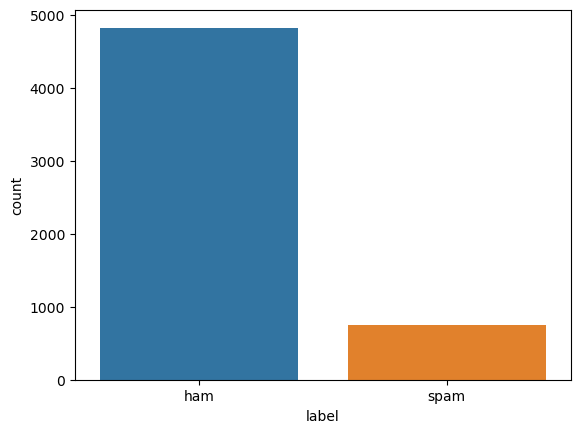

In [5]:
sns.countplot(x=df.label)
plt.show();

In [6]:
avg_words_len = round(sum([len(i.split()) for i in df["Text"]]) / len(df["Text"]))
print(avg_words_len)

15


In [7]:
s = set()
for sent in df["Text"]:
    for word in sent.split():
        s.add(word)
total_words_len = len(s)
print(total_words_len)

15585


In [8]:
from sklearn.model_selection import train_test_split

X, y = np.asanyarray(df["Text"]), np.asanyarray(df["label_enc"])
new_df = pd.DataFrame({"Text" : X, "label" : y})
new_df

,Text,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(new_df["Text"], new_df["label"], test_size=0.2, random_state=42)


In [13]:
X_train

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: Text, Length: 4457, dtype: object

In [14]:
X_test

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
                              ...                        
4264     &lt;DECIMAL&gt; m but its not a common car he...
2439    Rightio. 11.48 it is then. Well arent we all u...
5556    Yes i have. So that's why u texted. Pshew...mi...
4205                               Get the door, I'm here
4293    Kit Strip - you have been billed 150p. Netcoll...
Name: Text, Length: 1115, dtype: object

In [15]:
y_train

1978    0
3989    1
3935    0
4078    0
4086    1
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: label, Length: 4457, dtype: int64

In [16]:
y_test

3245    0
944     0
1044    1
2484    0
812     1
       ..
4264    0
2439    0
5556    0
4205    0
4293    1
Name: label, Length: 1115, dtype: int64

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457,), (4457,), (1115,), (1115,))

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [21]:
tfidf = TfidfVectorizer().fit(X_train)
X_train_vec, X_test_vec = tfidf.transform(X_train), tfidf.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

MultinomialNB()

In [23]:
nb_accuracy = accuracy_score(y_test, baseline_model.predict(X_test_vec))
nb_accuracy

0.9623318385650225

In [25]:
print(classification_report(y_test, baseline_model.predict(X_test_vec)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

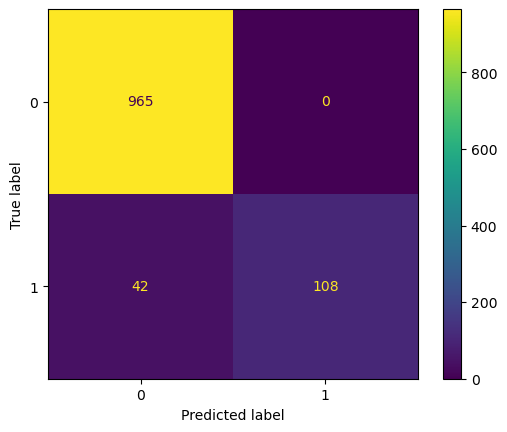

In [35]:
cf = confusion_matrix(y_test, baseline_model.predict(X_test_vec))
disp = ConfusionMatrixDisplay(cf)
disp.plot()

# Model 1: Creating custom Text vectorization and embedding layers:

In [37]:
from tensorflow.keras.layers import TextVectorization

MAXTOKENS = total_words_len
OUTPUTLEN = avg_words_len

text_vec = TextVectorization(
    max_tokens=MAXTOKENS,
    standardize="lower_and_strip_punctuation",
    output_mode="int",
    output_sequence_length=OUTPUTLEN)
text_vec.adapt(X_train)

In [38]:
sample_sentence = "My Name in Mahdi Irani"
text_vec([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 12, 273,   9,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [40]:
embedding_layer = layers.Embedding(
    input_dim=MAXTOKENS,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=OUTPUTLEN)

In [42]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation="relu")(x)
output_layer = layers.Dense(1, activation="sigmoid")(x)
model_1 = keras.Model(input_layer, output_layer)

model_1.compile(optimizer="adam", loss=keras.losses.BinaryCrossentropy(label_smoothing=0.5), metrics=["accuracy"])

In [43]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1994880   
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128  

In [44]:
history_1 = model_1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), validation_steps=int(0.2*len(X_test)))

Epoch 1/5
140/140 [==============================] - 4s 26ms/step - loss: 0.6043 - accuracy: 0.9114 - val_loss: 0.5764 - val_accuracy: 0.9731
Epoch 2/5
140/140 [==============================] - 3s 24ms/step - loss: 0.5700 - accuracy: 0.9874 - val_loss: 0.5735 - val_accuracy: 0.9821
Epoch 3/5
140/140 [==============================] - 3s 23ms/step - loss: 0.5657 - accuracy: 0.9953 - val_loss: 0.5729 - val_accuracy: 0.9839
Epoch 4/5
140/140 [==============================] - 3s 23ms/step - loss: 0.5642 - accuracy: 0.9984 - val_loss: 0.5728 - val_accuracy: 0.9803
Epoch 5/5
140/140 [==============================] - 3s 23ms/step - loss: 0.5635 - accuracy: 0.9989 - val_loss: 0.5728 - val_accuracy: 0.9794


<Axes: >

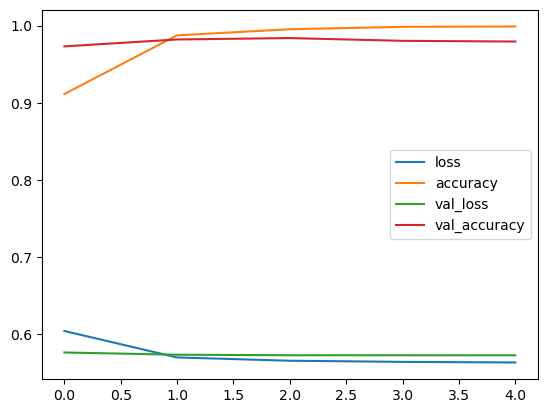

In [46]:
pd.DataFrame(history_1.history).plot()

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

def compile_model(model):
	'''
	simply compile the model with adam optimzer
	'''
	model.compile(optimizer=keras.optimizers.Adam(),
				loss=keras.losses.BinaryCrossentropy(),
				metrics=['accuracy'])

def fit_model(model, epochs, X_train=X_train, y_train=y_train,
			X_test=X_test, y_test=y_test):
	'''
	fit the model with given epochs, train 
	and test data
	'''
	history = model.fit(X_train,
						y_train,
						epochs=epochs,
						validation_data=(X_test, y_test),
						validation_steps=int(0.2*len(X_test)))
	return history

def evaluate_model(model, X, y):
	'''
	evaluate the model and returns accuracy, 
	precision, recall and f1-score 
	'''
	y_preds = np.round(model.predict(X))
	accuracy = accuracy_score(y, y_preds)
	precision = precision_score(y, y_preds)
	recall = recall_score(y, y_preds)
	f1 = f1_score(y, y_preds)

	model_results_dict = {'accuracy': accuracy,
						'precision': precision,
						'recall': recall,
						'f1-score': f1}

	return model_results_dict


# Model -2 Bidirectional LSTM

In [50]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
bi_lstm = layers.Bidirectional(layers.LSTM(
    64, activation='tanh', return_sequences=True))(embedding_layer_model)
lstm = layers.Bidirectional(layers.LSTM(64))(bi_lstm)
flatten = layers.Flatten()(lstm)
dropout = layers.Dropout(0.1)(flatten)
x = layers.Dense(32, activation="relu")(dropout)
output_layer = layers.Dense(1, activation="sigmoid")(x)
model_2 = keras.Model(input_layer, output_layer)
compile_model(model_2)
history_2 = fit_model(model_2, epochs=5)

Epoch 1/5
140/140 [==============================] - 13s 50ms/step - loss: 0.0561 - accuracy: 0.9798 - val_loss: 0.1577 - val_accuracy: 0.9713
Epoch 2/5
140/140 [==============================] - 6s 42ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.1439 - val_accuracy: 0.9812
Epoch 3/5
140/140 [==============================] - 6s 41ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1405 - val_accuracy: 0.9794
Epoch 4/5
140/140 [==============================] - 6s 40ms/step - loss: 3.0497e-05 - accuracy: 1.0000 - val_loss: 0.1536 - val_accuracy: 0.9803
Epoch 5/5
140/140 [==============================] - 6s 40ms/step - loss: 1.3576e-05 - accuracy: 1.0000 - val_loss: 0.1609 - val_accuracy: 0.9803


# Model -3 Transfer Learning with USE Encoder

In [54]:
import tensorflow_hub as hub

# model with Sequential api
model_3 = keras.Sequential()

# universal-sentence-encoder layer 
# directly from tfhub
use_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
						trainable=False,
						input_shape=[],
						dtype=tf.string,
						name='USE')


KeyboardInterrupt: 

In [55]:
# Upper cell will download about 1GB

In [ ]:
model_3.add(use_layer)
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(64, activation=keras.activations.relu))
model_3.add(layers.Dense(1, activation=keras.activations.sigmoid))

compile_model(model_3)

history_3 = fit_model(model_3, epochs=5)


# Analyzing our Model Performance

In [57]:
baseline_model_results = evaluate_model(baseline_model, X_test_vec, y_test)
model_1_results = evaluate_model(model_1, X_test, y_test)
model_2_results = evaluate_model(model_2, X_test, y_test)
#model_3_results = evaluate_model(model_3, X_test, y_test)

total_results = pd.DataFrame({'MultinomialNB Model':baseline_model_results,
							'Custom-Vec-Embedding Model':model_1_results,
							'Bidirectional-LSTM Model':model_2_results,
							#'USE-Transfer learning Model':model_3_results
                             }).transpose()

total_results


35/35 [==============================] - 0s 7ms/step


,accuracy,precision,recall,f1-score
MultinomialNB Model,0.962332,1.000000,0.720000,0.837209
Custom-Vec-Embedding Model,0.979372,0.992248,0.853333,0.917563
Bidirectional-LSTM Model,0.980269,0.984848,0.866667,0.921986
